In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.set(color_codes=True)
#label Encoder
from sklearn.preprocessing import LabelEncoder
#Normalization
from sklearn import preprocessing
#Data Split-Train,Valid
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics,linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg

In [ ]:

reg_data = pd.read_csv(r'/content/drive/MyDrive/Python_DS_Project/Data/Life Expectancy Data.csv')

In [ ]:
reg_data_copy = reg_data.copy()

In [ ]:
reg_data.shape

(2938, 22)

In [ ]:
reg_data['Year'].value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

In [ ]:
reg_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# rename the columns without space
for column in reg_data.columns:

  reg_data.rename(columns = {column:column.strip()}, inplace = True)

In [ ]:
reg_data.shape

(2938, 22)

#Exploratory Data Analysis

In [ ]:
reg_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
reg_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

###Checking Missing Values - Imputation

['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


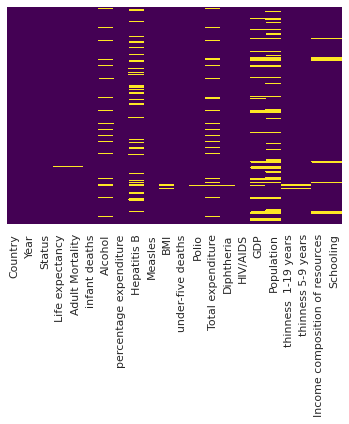

In [ ]:
missing_val_cols_greater_0 = [features for features in reg_data.columns if reg_data[features].isnull().sum()>0]
print(missing_val_cols_greater_0)
sns.heatmap(reg_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.savefig('missing_values.png')
plt.show()

In [ ]:
reg_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# for column in reg_data.columns:
#   if reg_data[column].isnull().sum() >0:
#       print(len(reg_data[column].unique()))
#       series_column_data = reg_data[column]
#       print(type(series_column_data))
#       Q1,Q3 = series_column_data.quantile([0.25,0.75])
#       IQR = Q3 - Q1
#       ul = Q3+1.5*IQR
#       print(ul)
#       ll = Q1-1.5*IQR
#       print(ll)
#       outliers = series_column_data[(series_column_data > ul) | (series_column_data < ll)]
#       print(len(outliers))
#       # print(outliers.median())
#       reg_data[column] = reg_data[column].fillna(reg_data[column].median())
    
#       sns.boxplot(y=reg_data[column])
#   else:
#       continue
# print(reg_data.isnull().sum())

363
<class 'pandas.core.series.Series'>
69.22493169398908
72.1
94.60000000000001
44.2
10
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


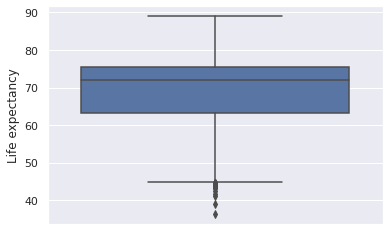

In [ ]:
# Missing value treatment for life expectancy target variable

print(len(reg_data['Life expectancy'].unique()))
life_expectancy_data = reg_data['Life expectancy']
print(type(life_expectancy_data))
print(life_expectancy_data.mean())
print(life_expectancy_data.median())
Q1,Q3 = life_expectancy_data.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = life_expectancy_data[(life_expectancy_data > ul) | (life_expectancy_data < ll)]
print(len(outliers))
# print(outliers.median())

# Filling the null values with median value
reg_data['Life expectancy'] = reg_data['Life expectancy'].fillna(reg_data['Life expectancy'].mean())
print(reg_data.isnull().sum())

sns.boxplot(y=reg_data['Life expectancy'])


<class 'pandas.core.series.Series'>
144.0
164.79644808743168
459.0
-157.0
534.5
82
[491.0, 566.0, 652.0, 693.0, 699.0, 679.0, 647.0, 466.0, 472.0, 473.0, 473.0, 467.0, 461.0, 477.0, 495.0, 511.0, 512.0, 593.0, 682.0, 484.0, 522.0, 518.0, 513.0, 527.0, 566.0, 592.0, 633.0, 654.0, 675.0, 666.0, 648.0, 622.0, 586.0, 543.0, 462.0, 491.0, 525.0, 559.0, 587.0, 615.0, 613.0, 599.0, 588.0, 477.0, 483.0, 471.0, 463.0, 464.0, 496.0, 513.0, 519.0, 533.0, 473.0, 486.0, 496.0, 498.0, 497.0, 485.0, 477.0, 564.0, 587.0, 568.0, 536.0, 485.0, 523.0, 539.0, 554.0, 487.0, 526.0, 554.0, 578.0, 611.0, 614.0, 464.0, 527.0, 587.0, 632.0, 717.0, 723.0, 715.0, 686.0, 665.0]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                   

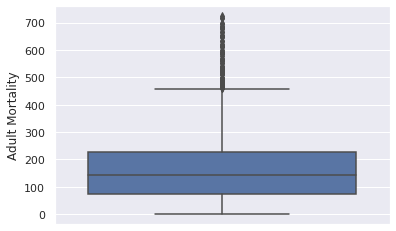

In [ ]:
#Adult Mortality Missing Values
# We have 10 missing values for Adult Mortality column
adult_column = reg_data['Adult Mortality']
print(type(adult_column))
# Missing value treatment for life expectancy target variable
len(reg_data['Adult Mortality'].unique())
print(adult_column.median())
print(adult_column.mean())
Q1,Q3 = adult_column.quantile([0.25,0.75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = adult_column[(adult_column > ul) | (adult_column < ll)]
print(outliers.median())
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Adult Mortality'])


#Filling the NA values with Median of the adult column
reg_data['Adult Mortality'] =reg_data['Adult Mortality'].fillna(reg_data['Adult Mortality'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
3.755
4.602860787172012
0.8775 7.702500000000001
17.94
-9.360000000000001
0
[]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


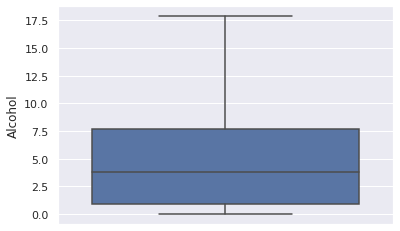

In [ ]:
#Alcohol
alcohol_col = reg_data['Alcohol']
print(type(alcohol_col))
len(reg_data['Alcohol'].unique())
print(alcohol_col.median())
print(alcohol_col.mean())
Q1,Q3 = alcohol_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = alcohol_col[(alcohol_col > ul) | (alcohol_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Alcohol'])



#Filling the NA values with Median of the Alcohol  column
reg_data['Alcohol'] =reg_data['Alcohol'].fillna(reg_data['Alcohol'].median())
print(reg_data.isnull().sum())


# outliers = []
# alcohol_col = alcohol_col.tolist()
# #Find outliers Using Z - Score
# def detect_outliers(alcohol_col):
#     threshold = 3 # third standard deviation
#     mean = np.mean(alcohol_col)
#     std = np.std(alcohol_col)

#     for i in alcohol_col:
#         z_score = (i-mean)/std
#         if np.abs(z_score)> threshold:
#             outliers.append(i)
#     return outliers

# outlier_list = detect_outliers(alcohol_col)
# print(len(outlier_list))

<class 'pandas.core.series.Series'>
92.0
80.94046121593291
77.0 97.0
127.0
47.0
254
[9.0, 8.0, 9.0, 44.0, 33.0, 8.0, 5.0, 5.0, 9.0, 21.0, 45.0, 11.0, 5.0, 18.0, 7.0, 6.0, 6.0, 6.0, 8.0, 7.0, 15.0, 8.0, 9.0, 9.0, 36.0, 9.0, 9.0, 8.0, 1.0, 9.0, 4.0, 8.0, 8.0, 7.0, 7.0, 42.0, 28.0, 14.0, 14.0, 14.0, 14.0, 14.0, 23.0, 45.0, 42.0, 46.0, 37.0, 39.0, 4.0, 33.0, 39.0, 24.0, 17.0, 9.0, 9.0, 7.0, 6.0, 9.0, 8.0, 28.0, 8.0, 9.0, 7.0, 9.0, 8.0, 27.0, 8.0, 6.0, 7.0, 25.0, 8.0, 8.0, 8.0, 9.0, 36.0, 9.0, 16.0, 2.0, 9.0, 9.0, 42.0, 39.0, 35.0, 35.0, 28.0, 29.0, 28.0, 26.0, 8.0, 7.0, 28.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 9.0, 8.0, 9.0, 6.0, 7.0, 44.0, 38.0, 37.0, 29.0, 6.0, 6.0, 8.0, 6.0, 46.0, 9.0, 36.0, 9.0, 8.0, 5.0, 9.0, 9.0, 44.0, 5.0, 45.0, 5.0, 9.0, 8.0, 8.0, 9.0, 6.0, 17.0, 5.0, 8.0, 7.0, 7.0, 9.0, 9.0, 8.0, 8.0, 8.0, 42.0, 9.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 43.0, 8.0, 25.0, 4.0, 39.0, 8.0, 9.0, 41.0, 27.0, 2.0, 2.0, 2.0, 9.0, 9.0, 9.0, 9.0, 7.0, 46.0, 42.0, 46.0, 41.0, 42.0, 27.0, 18.0, 7.0,

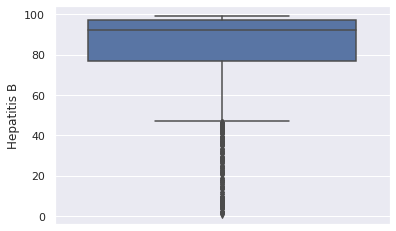

In [ ]:
# Hepatitis B 
hepatitis_col = reg_data['Hepatitis B']
print(type(hepatitis_col))
len(reg_data['Hepatitis B'].unique())
print(hepatitis_col.median())
print(hepatitis_col.mean())
Q1,Q3 = hepatitis_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = hepatitis_col[(hepatitis_col > ul) | (hepatitis_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Hepatitis B'])



#Filling the NA values with Median of the Hepatitis B  column
reg_data['Hepatitis B'] =reg_data['Hepatitis B'].fillna(reg_data['Hepatitis B'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
43.5
38.321246556473824
19.3 56.2
111.55000000000001
-36.05000000000001
0
[]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


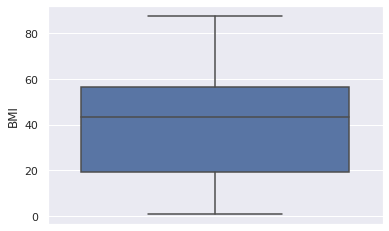

In [ ]:

# BMI

bmi_col = reg_data['BMI']
print(type(bmi_col))
len(reg_data['BMI'].unique())
print(bmi_col.median())
print(bmi_col.mean())
Q1,Q3 = bmi_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = bmi_col[(bmi_col > ul) | (bmi_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['BMI'])



#Filling the NA values with Mean of the BMI  column, we have no outliers
reg_data['BMI'] =reg_data['BMI'].fillna(reg_data['BMI'].mean())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
93.0
82.55018842069202
78.0 97.0
125.5
49.5
279
[6.0, 5.0, 41.0, 36.0, 35.0, 24.0, 7.0, 36.0, 39.0, 4.0, 4.0, 37.0, 41.0, 3.0, 9.0, 9.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 45.0, 7.0, 7.0, 9.0, 9.0, 8.0, 8.0, 9.0, 47.0, 47.0, 23.0, 47.0, 47.0, 46.0, 45.0, 46.0, 46.0, 47.0, 47.0, 45.0, 44.0, 42.0, 4.0, 38.0, 44.0, 46.0, 4.0, 43.0, 32.0, 3.0, 38.0, 49.0, 37.0, 31.0, 36.0, 31.0, 26.0, 3.0, 9.0, 9.0, 9.0, 8.0, 7.0, 7.0, 8.0, 9.0, 5.0, 41.0, 32.0, 31.0, 9.0, 8.0, 9.0, 8.0, 6.0, 47.0, 4.0, 3.0, 42.0, 9.0, 49.0, 46.0, 9.0, 9.0, 9.0, 9.0, 9.0, 17.0, 24.0, 3.0, 3.0, 39.0, 5.0, 48.0, 46.0, 44.0, 43.0, 41.0, 9.0, 7.0, 7.0, 7.0, 8.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 9.0, 8.0, 8.0, 9.0, 9.0, 9.0, 8.0, 42.0, 42.0, 6.0, 46.0, 47.0, 9.0, 6.0, 5.0, 9.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 7.0, 8.0, 8.0, 9.0, 6.0, 46.0, 5.0, 46.0, 8.0, 9.0, 9.0, 9.0, 9.0, 49.0, 8.0, 47.0, 49.0, 9.0, 7.0, 8.0, 6.0, 7.0,

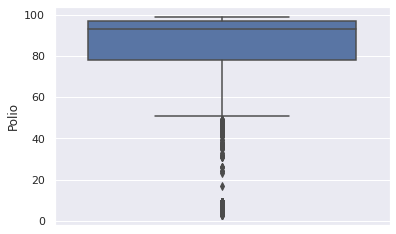

In [ ]:
#Polio
polio_col = reg_data['Polio']
print(type(polio_col))
len(reg_data['Polio'].unique())
print(polio_col.median())
print(polio_col.mean())
Q1,Q3 = polio_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = polio_col[(polio_col > ul) | (polio_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Polio'])



#Filling the NA values with Median of the Polio  column
reg_data['Polio'] =reg_data['Polio'].fillna(reg_data['Polio'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
5.755
5.9381895280235995
4.26 7.4925
12.341249999999999
-0.5887500000000001
32
[13.66, 14.39, 12.6, 13.73, 17.24, 13.71, 13.38, 12.77, 13.76, 13.83, 13.44, 12.94, 12.8, 12.49, 13.13, 13.63, 16.61, 17.14, 16.9, 17.2, 17.6, 17.2, 17.0, 16.2, 15.57, 15.27, 15.15, 15.14, 15.6, 14.55, 13.73, 13.7]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Populat

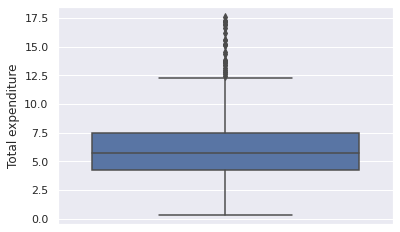

In [ ]:
#Total expenditure
expenditure_col = reg_data['Total expenditure']
print(type(expenditure_col))
len(reg_data['Total expenditure'].unique())
print(expenditure_col.median())
print(expenditure_col.mean())
Q1,Q3 = expenditure_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = expenditure_col[(expenditure_col > ul) | (expenditure_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Total expenditure'])



#Filling the NA values with Median of the Total expenditure  column
reg_data['Total expenditure'] =reg_data['Total expenditure'].fillna(reg_data['Total expenditure'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
93.0
82.32408359027065
78.0 97.0
125.5
49.5
298
[5.0, 41.0, 36.0, 33.0, 24.0, 6.0, 34.0, 38.0, 4.0, 4.0, 41.0, 38.0, 28.0, 9.0, 9.0, 5.0, 8.0, 7.0, 9.0, 8.0, 9.0, 45.0, 8.0, 8.0, 9.0, 9.0, 9.0, 8.0, 6.0, 8.0, 8.0, 47.0, 47.0, 23.0, 47.0, 47.0, 45.0, 42.0, 45.0, 48.0, 47.0, 44.0, 4.0, 37.0, 46.0, 37.0, 39.0, 4.0, 33.0, 39.0, 24.0, 19.0, 28.0, 4.0, 25.0, 21.0, 23.0, 25.0, 26.0, 36.0, 9.0, 9.0, 8.0, 8.0, 7.0, 7.0, 8.0, 9.0, 5.0, 41.0, 31.0, 33.0, 9.0, 9.0, 8.0, 6.0, 7.0, 6.0, 41.0, 38.0, 3.0, 4.0, 9.0, 46.0, 9.0, 16.0, 2.0, 3.0, 24.0, 41.0, 44.0, 43.0, 42.0, 41.0, 4.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 9.0, 9.0, 5.0, 46.0, 44.0, 4.0, 37.0, 35.0, 32.0, 3.0, 9.0, 8.0, 7.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 8.0, 8.0, 9.0, 9.0, 8.0, 8.0, 6.0, 6.0, 5.0, 46.0, 8.0, 6.0, 49.0, 9.0, 6.0, 48.0, 6.0, 6.0, 48.0, 45.0, 41.0, 9.0, 7.0, 7.0, 8.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 7.0, 9.0, 5.0, 49.0, 45.0, 49.0, 8.0, 8.0, 9.0, 9.0, 5.0, 8.0, 7.0, 6.0, 6.0, 31.0

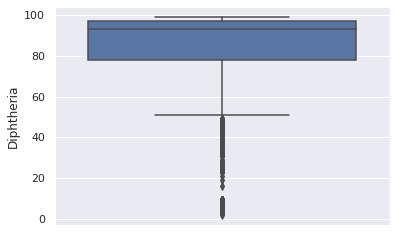

In [ ]:
#Diphtheria
diphtheria_col = reg_data['Diphtheria']
print(type(diphtheria_col))
len(reg_data['Diphtheria'].unique())
print(diphtheria_col.median())
print(diphtheria_col.mean())
Q1,Q3 = diphtheria_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = diphtheria_col[(diphtheria_col > ul) | (diphtheria_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Diphtheria'])



#Filling the NA values with Median of the Diphtheria  column
reg_data['Diphtheria'] =reg_data['Diphtheria'].fillna(reg_data['Diphtheria'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
1766.947595
7483.158469138474
463.935626 5910.806335
14081.112398500001
-7706.3704375
365
[14252.29452, 56554.3876, 62214.6912, 67792.3386, 67677.63477, 62245.129, 51874.848, 42742.99898, 49664.6854, 36118.28381, 23465.38559, 19517.84168, 43665.947, 51322.63997, 48333.57273, 51126.74139, 46657.629, 47654.18721, 51386.37665, 46586.6525, 38242.4252, 36693.4262, 26351.37568, 24489.73553, 24517.26745, 22688.87824, 24983.3792, 23649.36661, 19356.67236, 17959.17854, 15846.47641, 14221.99259, 15557.8381, 15359.66971, 15472.7814, 15384.8749, 15534.1574, 16523.32388, 16462.48556, 15646.5591, 14223.86576, 47439.39684, 48424.58927, 38852.3613, 36967.28292, 35589.71295, 23121.56635, 44597.27968, 47651.2599, 35268.1117, 27965.4754, 37951.286, 32672.36717, 21896.6527, 18555.56649, 16846.2198, 16468.12886, 43315.744, 52413.72116, 52496.69487, 47447.4762, 46596.33599, 44544.5268, 36189.58838, 31979.87195, 28172.14883, 24167.8431, 23691.59472, 24124.16917, 14817.3777

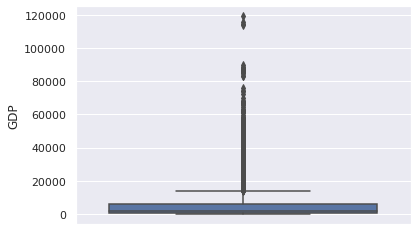

In [ ]:
#GDP
gdp_col = reg_data['GDP']
print(type(gdp_col))
len(reg_data['GDP'].unique())
print(gdp_col.median())
print(gdp_col.mean())
Q1,Q3 = gdp_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = gdp_col[(gdp_col > ul) | (gdp_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['GDP'])



#Filling the NA values with Median of the GDP  column, GDP has more outliers
reg_data['GDP'] =reg_data['GDP'].fillna(reg_data['GDP'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
1386542.0
12753375.120052494
195793.25 7420359.0
18257207.625
-10641055.375
294
[33736494.0, 31731688.0, 26616792.0, 24118979.0, 21979923.0, 39871528.0, 39113313.0, 38338562.0, 37565847.0, 36819558.0, 36117637.0, 33777915.0, 33288437.0, 31592153.0, 24218565.0, 23369131.0, 22549547.0, 19552542.0, 18865716.0, 43417765.0, 42981515.0, 42539925.0, 41656879.0, 41223889.0, 39145488.0, 38728696.0, 23789338.0, 23117353.0, 22728254.0, 157571292.0, 153911916.0, 147139191.0, 131581243.0, 24213133.0, 198686688.0, 196796269.0, 194895996.0, 19297929.0, 19126637.0, 18912412.0, 186917361.0, 184738458.0, 182482149.0, 175287587.0, 22834522.0, 21655715.0, 19432541.0, 18395389.0, 35544564.0, 35155451.0, 33628571.0, 33245773.0, 32887928.0, 48228697.0, 47791911.0, 47342981.0, 46881475.0, 45416181.0, 44374572.0, 43835722.0, 43285634.0, 42724163.0, 42152151.0, 41572491.0, 97366774.0, 94887724.0, 92444183.0, 85416253.0, 83184892.0, 72545144.0, 68492257.0, 66537331.0, 66331957

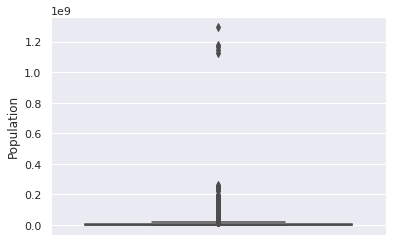

In [ ]:
#Population
population_col = reg_data['Population']
print(type(population_col))
len(reg_data['Population'].unique())
print(population_col.median())
print(population_col.mean())
Q1,Q3 = population_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = population_col[(population_col > ul) | (population_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Population'])



#Filling the NA values with Median of the Population column
reg_data['Population'] =reg_data['Population'].fillna(reg_data['Population'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
3.3
4.839703856749312
1.6 7.2
15.599999999999998
-6.799999999999999
89
[17.2, 17.5, 17.7, 17.9, 18.2, 18.4, 18.6, 18.8, 19.0, 19.2, 19.3, 19.5, 19.7, 19.9, 17.9, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1, 19.3, 19.5, 19.7, 19.9, 15.7, 15.9, 16.1, 16.3, 16.6, 16.8, 17.1, 17.3, 17.5, 17.8, 18.0, 18.3, 18.6, 18.9, 19.2, 26.7, 26.8, 26.8, 26.9, 26.9, 27.0, 27.0, 27.0, 27.1, 27.1, 27.2, 27.2, 27.3, 27.4, 27.5, 27.7, 15.7, 15.7, 15.9, 16.1, 16.3, 16.5, 16.7, 16.9, 17.0, 17.2, 17.4, 17.6, 17.8, 18.0, 18.2, 18.3, 18.5, 19.2, 19.4, 19.6, 19.8, 21.0, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 16.3, 15.6, 15.6, 15.7, 15.8]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles

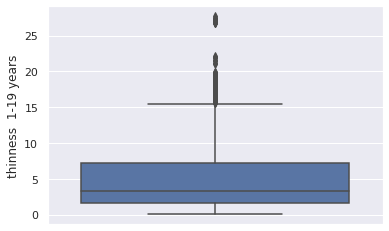

In [ ]:
#thinness  1-19 years
thinness_1_19_years_col = reg_data['thinness  1-19 years']
print(type(thinness_1_19_years_col))
len(reg_data['thinness  1-19 years'].unique())
print(thinness_1_19_years_col.median())
print(thinness_1_19_years_col.mean())
Q1,Q3 = thinness_1_19_years_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = thinness_1_19_years_col[(thinness_1_19_years_col > ul) | (thinness_1_19_years_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['thinness  1-19 years'])


#Filling the NA values with Median of the thinness  1-19 years  column,
reg_data['thinness  1-19 years'] =reg_data['thinness  1-19 years'].fillna(reg_data['thinness  1-19 years'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
3.3
4.870316804407714
1.5 7.2
15.75
-7.050000000000001
96
[17.3, 17.5, 17.7, 18.0, 18.2, 18.4, 18.7, 18.9, 19.1, 19.3, 19.5, 19.7, 19.9, 18.3, 18.6, 18.8, 19.0, 19.2, 19.4, 19.7, 19.9, 21.1, 21.3, 21.5, 16.0, 16.2, 16.5, 16.7, 17.0, 17.3, 17.5, 17.8, 18.1, 18.3, 18.6, 18.8, 19.1, 19.4, 19.6, 19.9, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.8, 27.9, 28.0, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 15.9, 16.1, 16.3, 16.5, 16.7, 16.9, 17.2, 17.4, 17.6, 17.8, 18.0, 18.2, 18.4, 18.6, 18.8, 19.0, 19.2, 19.6, 19.8, 21.1, 21.3, 21.5, 21.7, 21.8, 22.0, 22.2, 22.4, 22.6, 16.1, 17.1, 18.1, 19.1, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.4]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B      

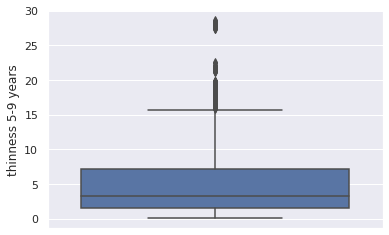

In [ ]:
#thinness  5-9 years
thinness_5_9_years_col = reg_data['thinness 5-9 years']
print(type(thinness_1_19_years_col))
len(reg_data['thinness 5-9 years'].unique())
print(thinness_5_9_years_col.median())
print(thinness_5_9_years_col.mean())
Q1,Q3 = thinness_5_9_years_col.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = thinness_5_9_years_col[(thinness_5_9_years_col > ul) | (thinness_5_9_years_col < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['thinness 5-9 years'])


#Filling the NA values with Median of the thinness 5-9 years  column
reg_data['thinness 5-9 years'] =reg_data['thinness 5-9 years'].fillna(reg_data['thinness 5-9 years'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
0.677
0.6275510645976182
0.493 0.779
1.2080000000000002
0.06399999999999995
130
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0

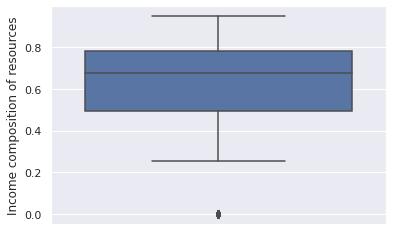

In [ ]:
# Income composition of resources
Income_compos_resoces = reg_data['Income composition of resources']
print(type(Income_compos_resoces))
# len(reg_data['Income composition of resources'].unique())
print(Income_compos_resoces.median())
print(Income_compos_resoces.mean())
Q1,Q3 = Income_compos_resoces.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = Income_compos_resoces[(Income_compos_resoces > ul) | (Income_compos_resoces < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Income composition of resources'])


#Filling the NA values with Median of the thinness 5-9 years  column
reg_data['Income composition of resources'] =reg_data['Income composition of resources'].fillna(reg_data['Income composition of resources'].median())
print(reg_data.isnull().sum())

<class 'pandas.core.series.Series'>
12.3
11.992792792792793
10.1 14.3
20.6
3.799999999999998
44
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.7, 0.0, 3.6, 3.5, 3.4, 3.7, 3.5, 3.3, 2.9, 2.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.7, 3.5, 3.1, 3.0, 2.9, 2.9, 2.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 y

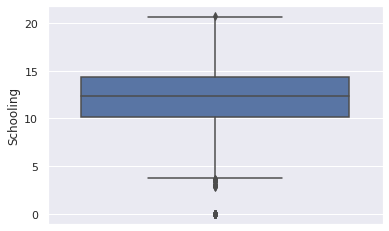

In [ ]:
# Schooling
schooling = reg_data['Schooling']
print(type(schooling))
# len(reg_data['Schooling'].unique())
print(schooling.median())
print(schooling.mean())
Q1,Q3 = schooling.quantile([0.25,0.75])
print(Q1,Q3)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
print(ul)
ll = Q1-1.5*IQR
print(ll)
outliers = schooling[(schooling > ul) | (schooling < ll)]
print(len(outliers))
print(list(outliers))
sns.boxplot(y=reg_data['Schooling'])


#Filling the NA values with Median of the thinness 5-9 years  column
reg_data['Schooling'] =reg_data['Schooling'].fillna(reg_data['Schooling'].median())
print(reg_data.isnull().sum())


###Pie Chart 

Index(['Afghanistan', 'Peru', 'Nicaragua', 'Niger', 'Nigeria', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Papua New Guinea',
       ...
       'Tuvalu', 'Cook Islands', 'Marshall Islands', 'Monaco', 'Palau', 'Niue',
       'San Marino', 'Nauru', 'Saint Kitts and Nevis', 'Dominica'],
      dtype='object', length=193)


([<matplotlib.patches.Wedge at 0x7fd69cb58910>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Afghanistan'),
  Text(-0.3399187231970732, 1.046162158377023, 'Peru'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'Nicaragua'),
  Text(-0.33991862524830174, -1.0461621902025062, 'Niger'),
  Text(0.8899187482945414, -0.6465637025335375, 'Nigeria')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.00%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20.00%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.00%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20.00%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.00%')])

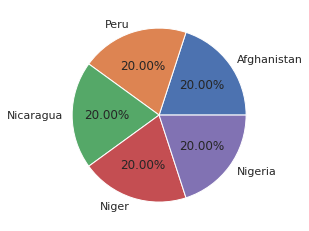

In [ ]:
country_names=reg_data.Country.value_counts().index
print(country_names)
country_val=reg_data.Country.value_counts().values
## Pie Chart- Top 3 countries that uses zomato
plt.pie(country_val[:5],labels=country_names[:5],autopct='%1.2f%%')

###Correlation Plot

###Heatmap

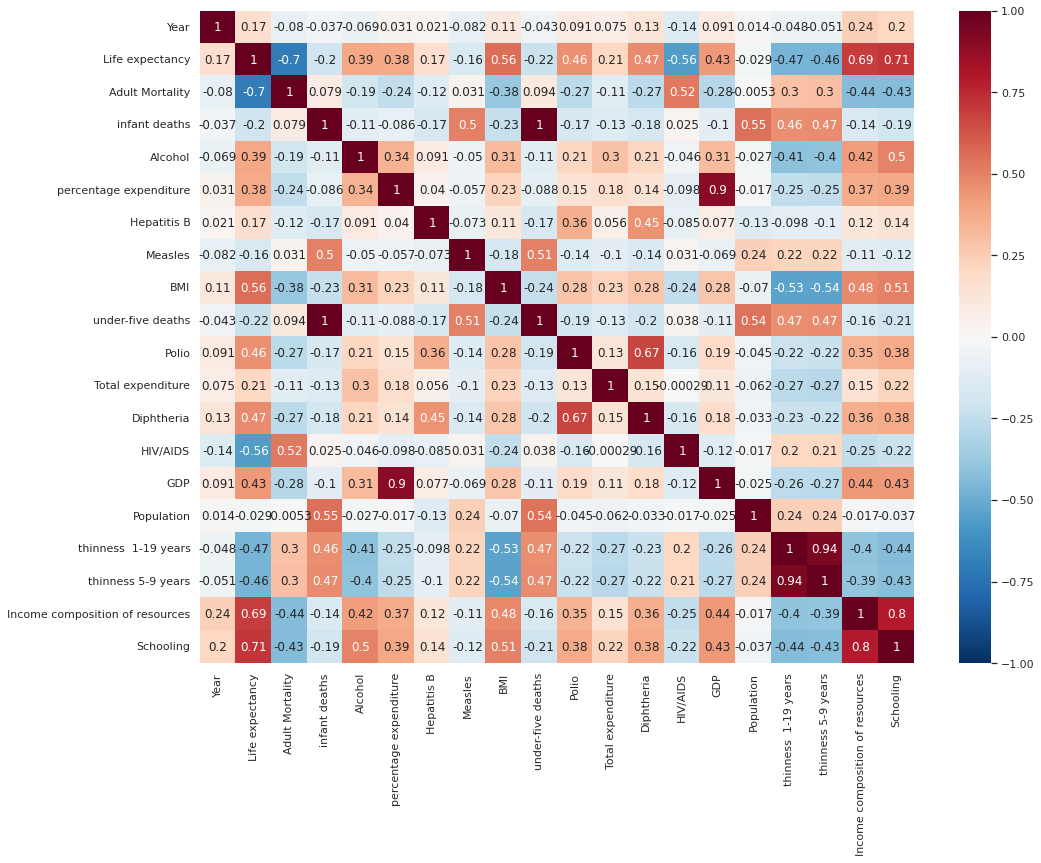

In [ ]:
corr_matrix = reg_data.corr()
# sns.heatmap(corr_matrix, 
#         xticklabels=corr_matrix.columns,
#         yticklabels=corr_matrix.columns)

sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, 
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1);
plt.savefig("sns-heatmap_correlation.png")

#Univariate Analysis - Numerical Variables

In [ ]:
reg_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

###Histogram 

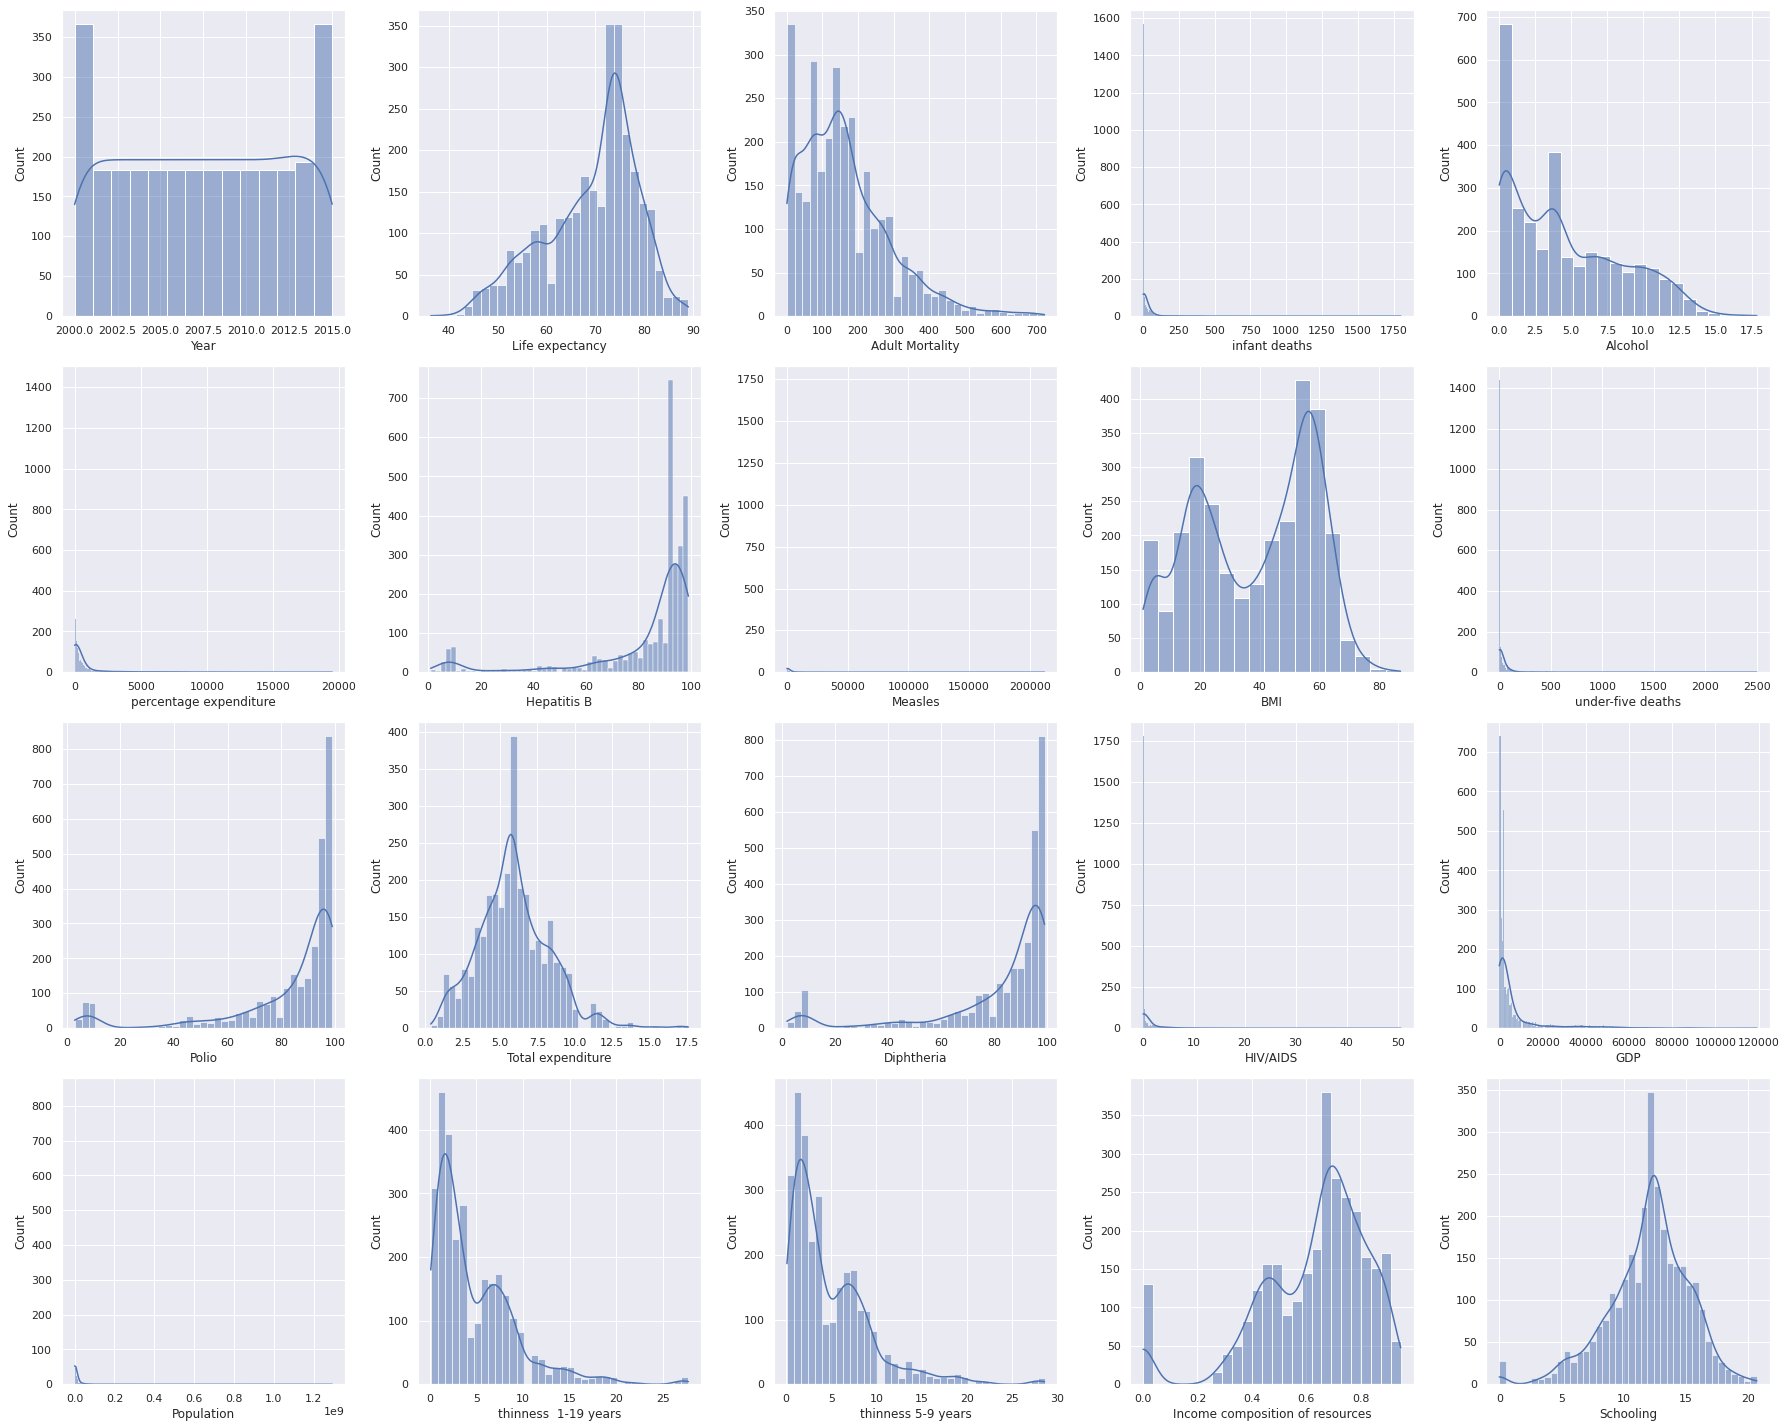

In [ ]:
cols = 5
rows = 4
num_cols = reg_data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = reg_data[col], ax = ax,kde=True)
    
fig.tight_layout()  
plt.savefig('Uniavriate_Histogram_plot.png')
plt.show()

###Box Plot

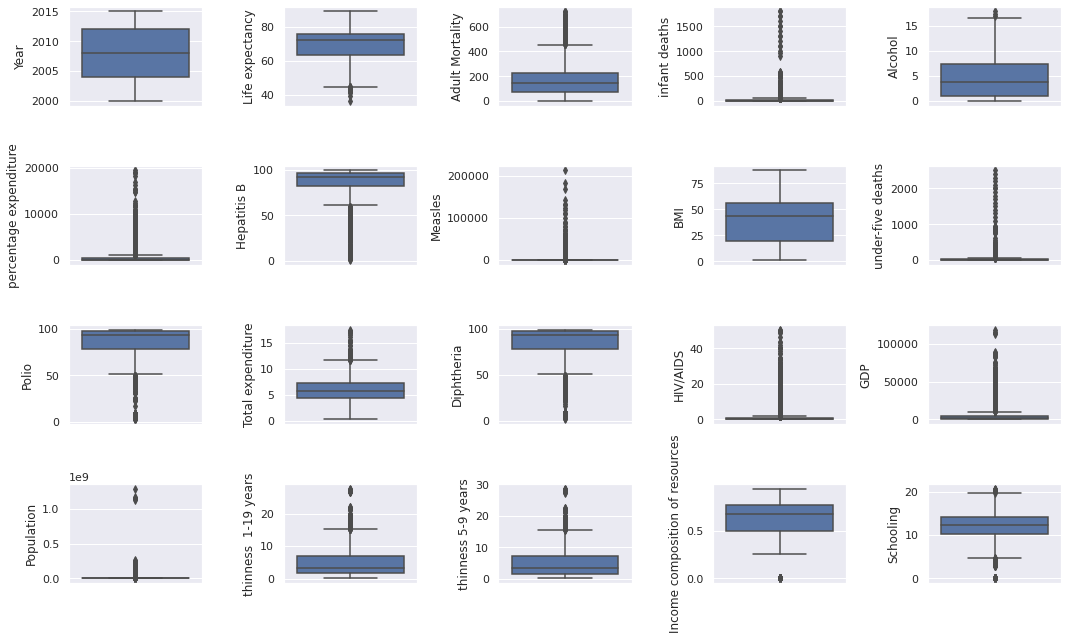

In [ ]:
cols = 5
rows = 4
num_cols = reg_data.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(y=reg_data[col], ax=ax)
    
fig.tight_layout()  
plt.savefig('Uniavriate_box_plot.png')
plt.show()

##Categorical Variables

###Count Plot

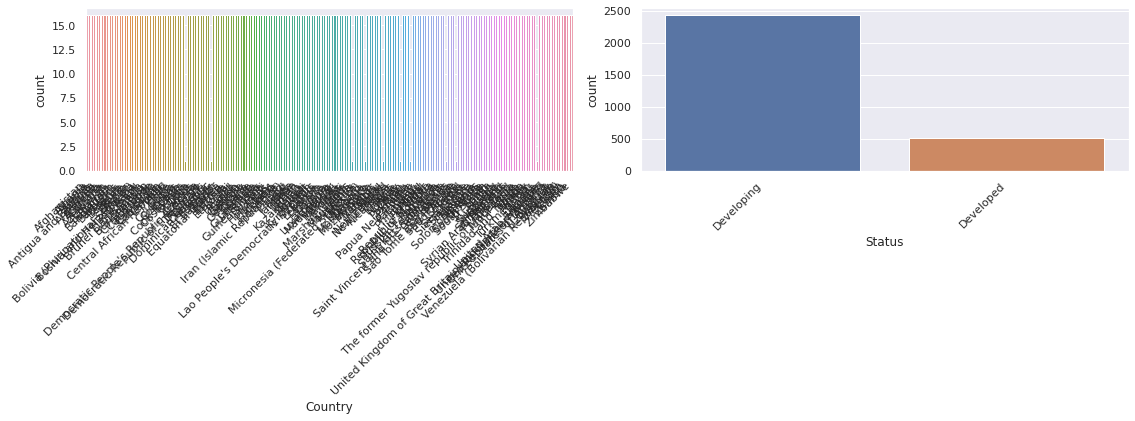

In [ ]:
#Status
# reg_data['Status'].value_counts()
# sns.set_style('darkgrid')
# sns.set(font_scale=1.3)
# sns.histplot(x='Status', data=reg_data)


cols = 2
rows = 1
fig = plt.figure(figsize= (16,6))
all_cats = reg_data.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 200]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=reg_data[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()
plt.savefig('Univariate_categorical_plot.png')  
plt.show()

###Pie Chart


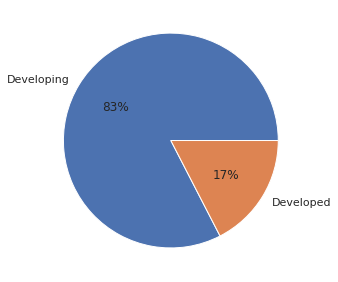

In [ ]:
# df = reg_data['Status'].value_counts()
# plt.pie(df, labels=df.index, autopct="%.0f%%")

sns.set(font_scale=1)
cols = 2
rows = 2
fig = plt.figure(figsize= (12,8))

for i, col in enumerate(cat_cols):
    if reg_data[col].value_counts().count()<10:
      df = reg_data[col].value_counts()
      
      ax = fig.add_subplot(rows, cols, i+1)
      
      plt.pie(df, labels=df.index, autopct="%.0f%%")
      
fig.tight_layout() 
plt.savefig('Pie_Chart_categorical.png') 
plt.show()

#Reset the scale back
sns.set(font_scale=1.3)

#Bivariate Analysis  - Numerical Features

### Pair Plot

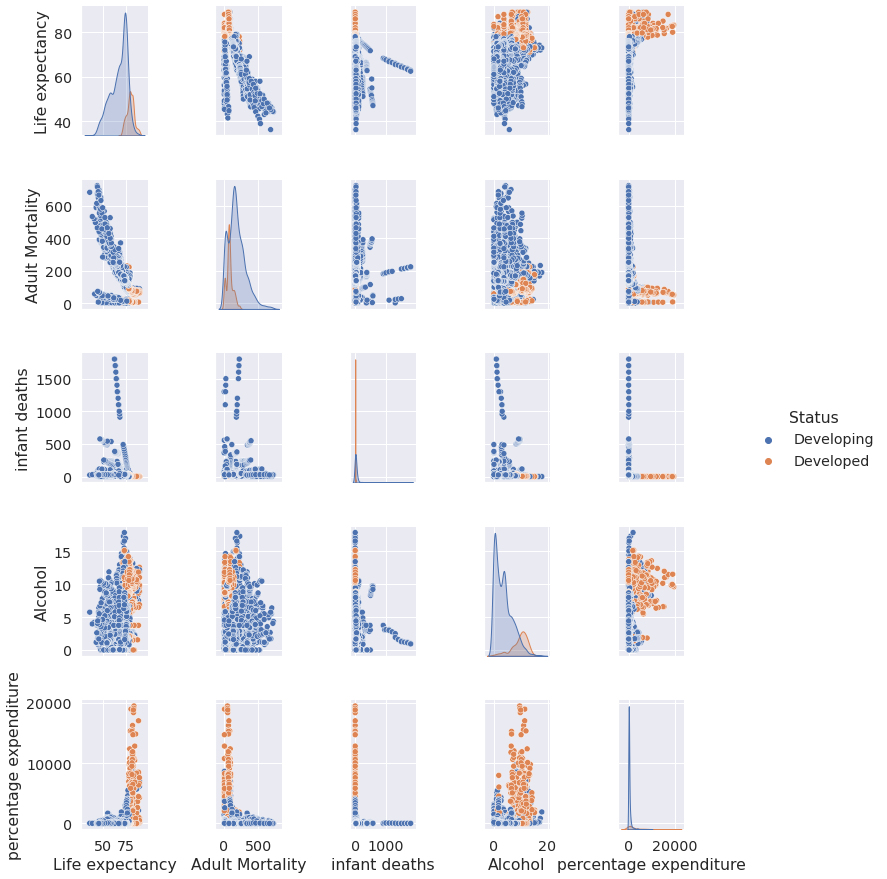

In [ ]:
sns.pairplot(reg_data,vars = [ 'Life expectancy', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure'],hue='Status',aspect = 0.85,diag_kind = 'kde');

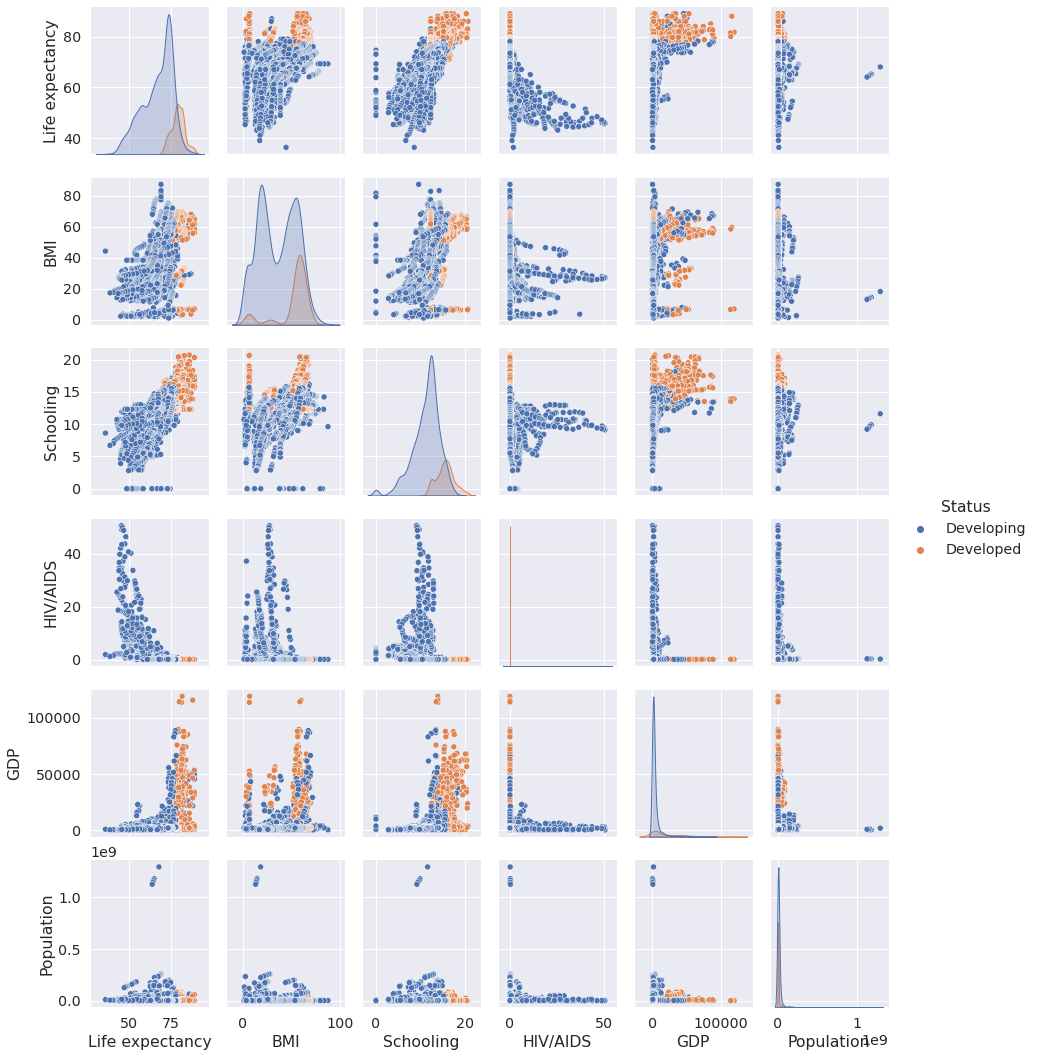

In [ ]:
sns.pairplot(reg_data,vars = [ 'Life expectancy', 'BMI',
       'Schooling', 'HIV/AIDS', 'GDP', 'Population'],hue='Status',aspect = 0.85,diag_kind = 'kde');
plt.savefig('pair_plot.png')
plt.show()

### Scatter Plot


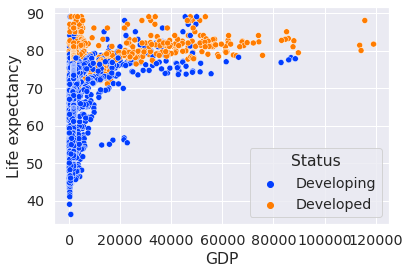

In [ ]:
ax = sns.scatterplot(x="GDP", y="Life expectancy", data=reg_data,palette='bright',
                hue='Status')
plt.savefig('scatter_plot_1.png')
plt.show()

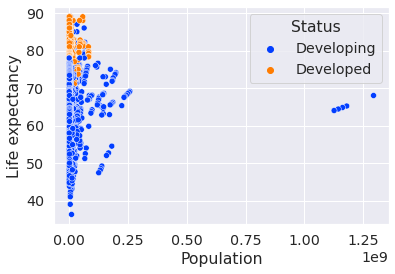

In [ ]:
ax = sns.scatterplot(x="Population", y="Life expectancy",palette='bright',
                hue='Status',data=reg_data)
plt.savefig('scatter_plot_2.png')
plt.show()

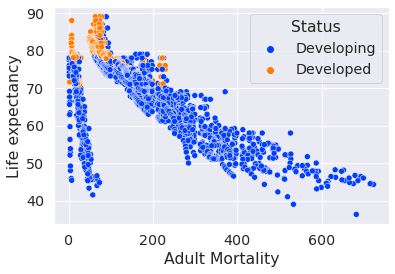

In [ ]:
ax = sns.scatterplot(x="Adult Mortality", y="Life expectancy", data=reg_data,palette='bright',
                hue='Status')
plt.savefig('scatter_plot_3.png')
plt.show()

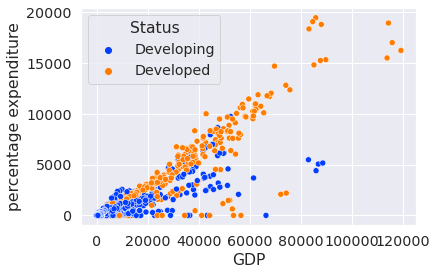

In [ ]:
ax = sns.scatterplot(x="GDP", y="percentage expenditure", data=reg_data,palette='bright',
                hue='Status')
plt.savefig('scatter_plot_4.png')
plt.show()

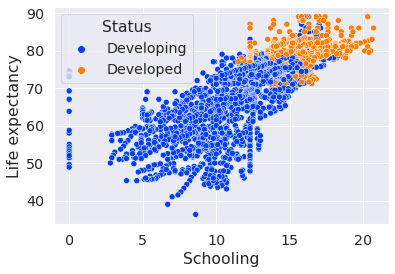

In [ ]:
ax = sns.scatterplot(x="Schooling", y="Life expectancy", data=reg_data,palette='bright',
                hue='Status')
plt.show()

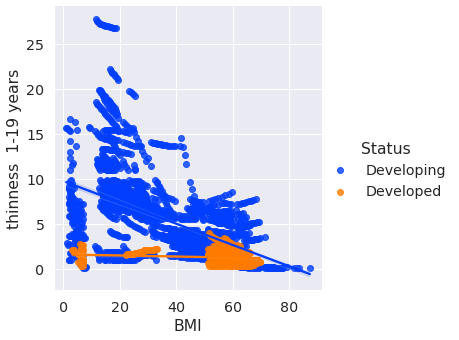

In [ ]:
# ax = sns.scatterplot(x="BMI", y="thinness  1-19 years", data=reg_data)
sns.lmplot(x="BMI", y="thinness  1-19 years", data=reg_data,palette='bright',
                hue='Status')
plt.show()

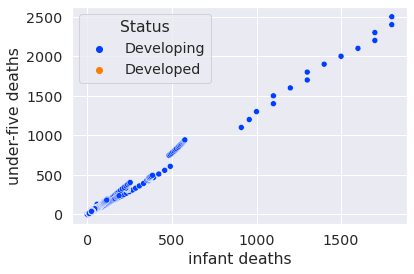

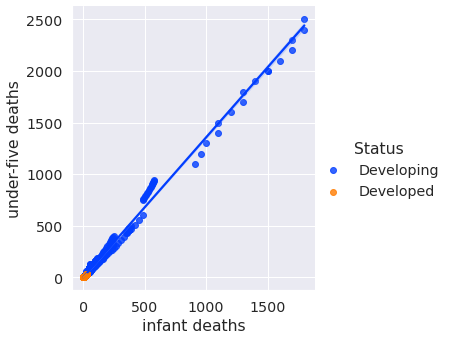

In [ ]:
ax = sns.scatterplot(x="infant deaths", y="under-five deaths", data=reg_data,palette='bright',
                hue='Status')
sns.lmplot(x="infant deaths", y="under-five deaths", data=reg_data,palette='bright',
                hue='Status')
plt.show()

###Joint Plot


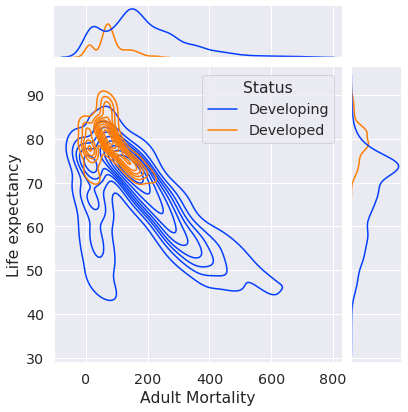

In [ ]:
sns.jointplot(x='Adult Mortality', 
              y='Life expectancy', 
              data=reg_data, 
              hue='Status', 
              kind = 'kde',
              palette='bright');
plt.savefig('joint_plot_1.png')
plt.show()

###Line Plot

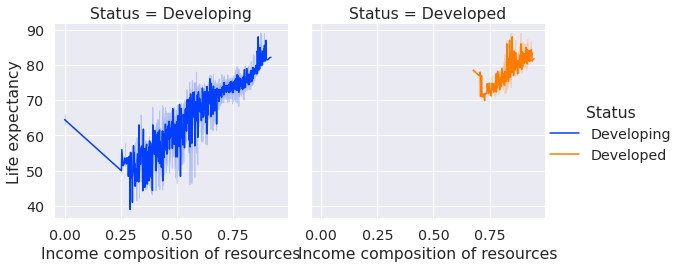

In [ ]:
sns.relplot(x="Income composition of resources", 
             y="Life expectancy",
             kind='line',
             data=reg_data,
             palette='bright',
             color = 'green',
             hue = 'Status',
             height = 4,
             col='Status');
plt.savefig('line_plot_1.png')
plt.show()

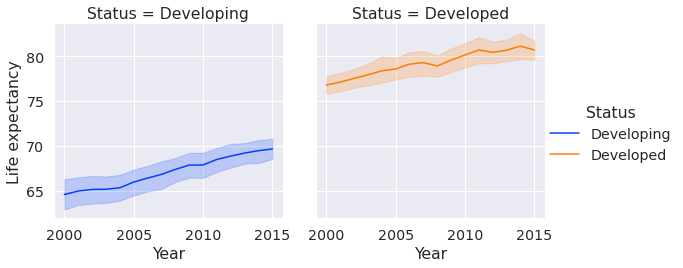

In [ ]:
sns.relplot(x="Year", 
             y="Life expectancy",
             kind='line',
             data=reg_data,
             palette='bright',
             color = 'green',
             hue = 'Status',
             height = 4,
             col='Status');

#### Categorical Features

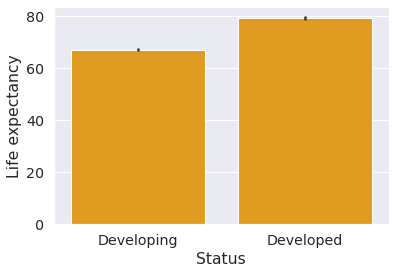

In [ ]:
#Status vs Life Expectancy
sns.barplot(x='Status', 
            y='Life expectancy', 
            data=reg_data, 
            color='orange');
plt.savefig('bar_plot_1.png')
plt.show()

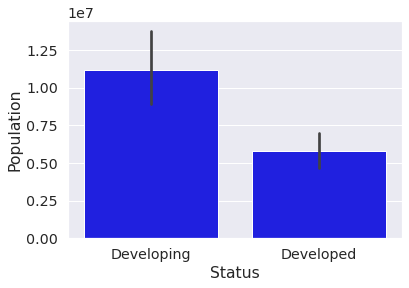

In [ ]:
sns.barplot(x='Status', 
            y='Population', 
            data=reg_data, 
            color='blue');
plt.savefig('bar_plot_2.png')
plt.show()

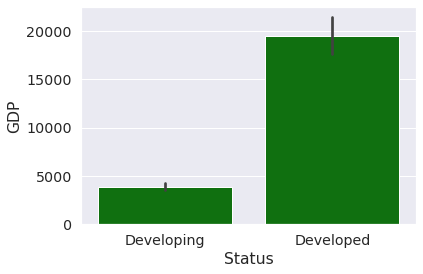

In [ ]:
sns.barplot(x='Status', 
            y='GDP', 
            data=reg_data, 
            color='green');
plt.savefig('bar_plot_3.png')
plt.show()

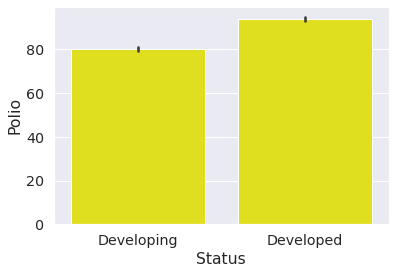

In [ ]:
sns.barplot(x='Status', 
            y='Polio', 
            data=reg_data, 
            color='yellow');
plt.savefig('bar_plot_4.png')
plt.show()

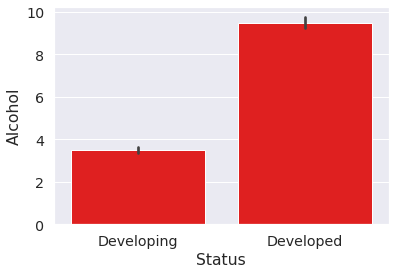

In [ ]:
sns.barplot(x='Status', 
            y='Alcohol', 
            data=reg_data, 
            color='red');
plt.savefig('bar_plot_5.png')
plt.show()

###Point Plot

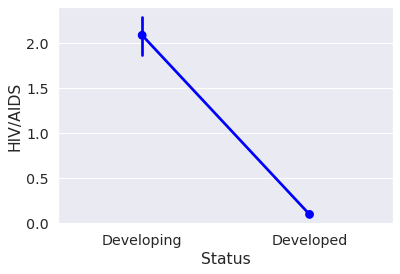

In [ ]:
sns.pointplot(x='Status', 
              y='HIV/AIDS', 
              data=reg_data, 
             color='blue');

plt.savefig('point_plot_1.png')
plt.show()

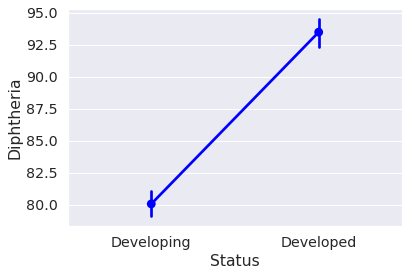

In [ ]:
sns.pointplot(x='Status', 
              y='Diphtheria', 
              data=reg_data, 
              # hue = 'Status',
             color='blue');
plt.savefig('point_plot_2.png')
plt.show()

In [ ]:
# Aggregate Country According to life Expectancy

# group_data = reg_data.groupby(["Country","Status"])["Life expectancy"].agg(['max', 'min', 'count', 'median', 'mean'])
# group_data
# group_data = reg_data.groupby(["Country"])
# group_data.get_group("Albania")
group_data = reg_data.groupby(["Country","Status"])["Life expectancy"].mean()
type(group_data)
group_data.head()

Country              Status    
Afghanistan          Developing    58.19375
Albania              Developing    75.15625
Algeria              Developing    73.61875
Angola               Developing    49.01875
Antigua and Barbuda  Developing    75.05625
Name: Life expectancy, dtype: float64

In [ ]:
group_data_df = group_data.to_frame(name="Mean_Life_Expectancy").reset_index()
group_data_df.head()

,Country,Status,Mean_Life_Expectancy
0,Afghanistan,Developing,58.19375
1,Albania,Developing,75.15625
2,Algeria,Developing,73.61875
3,Angola,Developing,49.01875
4,Antigua and Barbuda,Developing,75.05625


In [ ]:
# Filter the data according to mean of life expectancy of a country >80
group_data_df_filtered =group_data_df.groupby('Country').filter(lambda x : x['Mean_Life_Expectancy'].mean() > 80)
group_data_df_filtered.head(24)

,Country,Status,Mean_Life_Expectancy
7,Australia,Developed,81.81250
8,Austria,Developed,81.48125
15,Belgium,Developed,80.68125
31,Canada,Developing,81.68750
59,Finland,Developing,80.71250
60,France,Developing,82.21875
64,Germany,Developed,81.17500
66,Greece,Developing,81.21875
75,Iceland,Developed,82.44375
80,Ireland,Developed,80.15000


In [ ]:
group_data_df_filtered.groupby('Country').filter(lambda x : x['Mean_Life_Expectancy'].mean() > 80).count()

Country                 24
Status                  24
Mean_Life_Expectancy    24
dtype: int64

In [ ]:
# reg_data.groupby(["Country","Status"])["Life expectancy"].agg({'Max Life expectancy':user_defined_function})
# reg_data.groupby(["Country","Status"])["Life expectancy"].transform('mean')
# print(group_data)
# reg_data.groupby('Country').filter(lambda x : x['Life expectancy'].mean() > 70)['Life expectancy'].nunique()

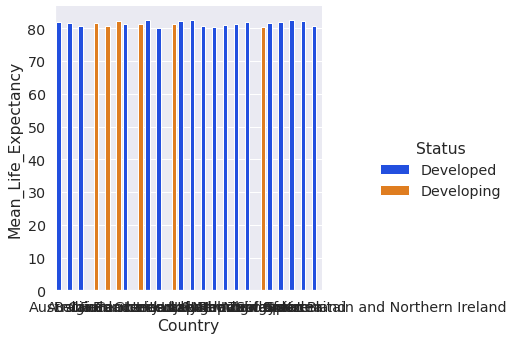

In [ ]:
sns.catplot(x="Country", 
            y="Mean_Life_Expectancy", 
            data=group_data_df_filtered,
            palette='bright',
            kind="bar",
            hue="Status")
plt.savefig('mean lifexpectancy>80.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


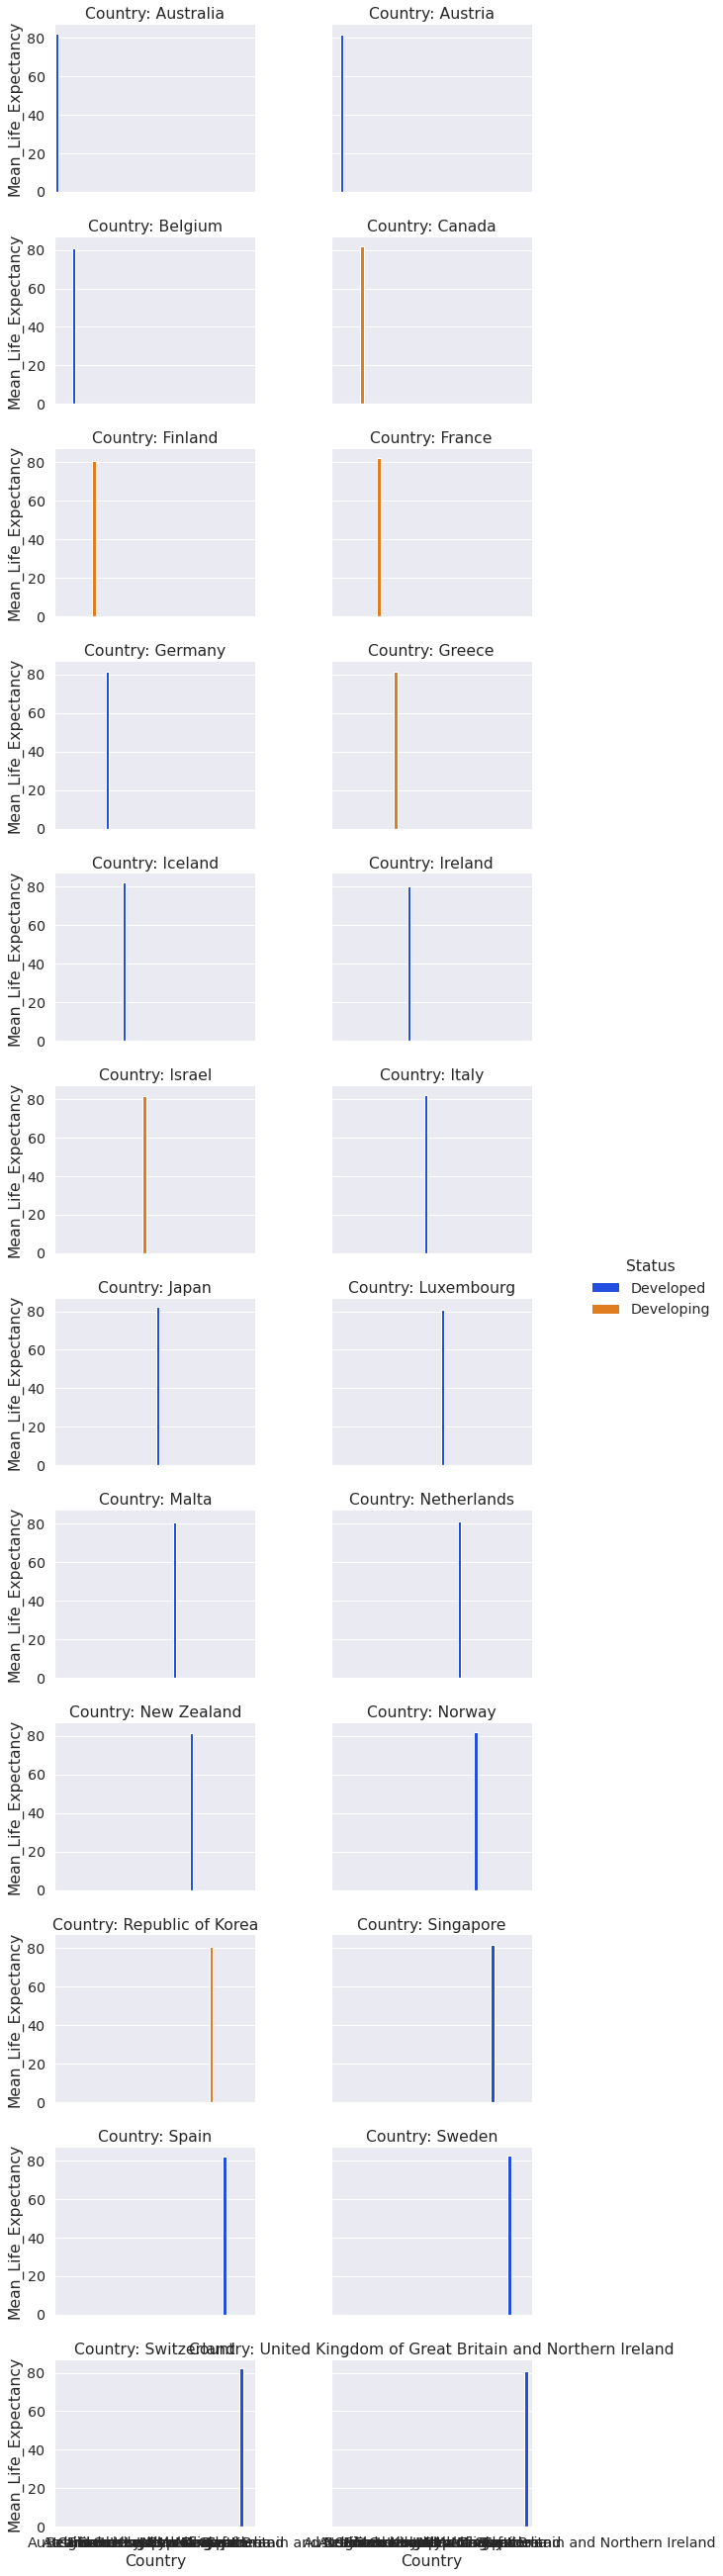

In [ ]:
g = sns.catplot(
        x='Country', 
        y='Mean_Life_Expectancy', 
        data=group_data_df_filtered,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='Status', 
        col ='Country',
        col_wrap=2)

g.set_titles(
    'Country: {col_name}');

In [ ]:
# sns.boxplot(x='Country', 
#             y='Mean_Life_Expectancy', 
#             data=group_data_df_filtered, 
#             color='blue')

# plt.xticks(rotation=45, ha='right');

# Data Preparation  For Modelling

In [ ]:
reg_data_pre_processed = reg_data.copy()
reg_data_pre_processed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
reg_data = reg_data_pre_processed.copy()

In [ ]:
print(reg_data.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [ ]:
#Removing the Year col, Because Year have no correlation with target variable
reg_data.drop(['Year'],axis =1,inplace =True)
reg_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#Removing Correlated variables in between features

#GDP and Percentage Expenditure
#Infant deaths and under-five deaths
# Here we are removing under-five deaths and percentage of expenditure column
reg_data.drop(['under-five deaths','percentage expenditure'],axis =1,inplace =True)
reg_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


####Binning-Categorical Feature


In [ ]:
country = reg_data['Country'].unique()
print(country)
print(len(country))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "C?te d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [ ]:
reg_data['Country'] = reg_data['Country'].replace(['Bolivia (Plurinational State of)'],'Bolivia')
reg_data['Country'] = reg_data['Country'].replace(["C?te d'Ivoire"],'Ivory Coast')
reg_data['Country'] = reg_data['Country'].replace(["Iran (Islamic Republic of)"],'Iran')
reg_data['Country'] = reg_data['Country'].replace(["Micronesia (Federated States of)"],'Micronesia')
reg_data['Country'] = reg_data['Country'].replace(["Republic of Korea"],'South Korea')
reg_data['Country'] = reg_data['Country'].replace(["The former Yugoslav republic of Macedonia"],'Macedonia')
# reg_data['Country'] = reg_data['Country'].replace(["TL"],'Timor-Leste')
reg_data['Country'] = reg_data['Country'].replace(["Venezuela (Bolivarian Republic of)"],'Venezuela')





In [ ]:
  # country_code = pc.country_name_to_country_alpha2('Timor-Leste', cn_name_format="default")
  # print(country_code)
  # continent_name = pc.country_alpha2_to_continent_code(country_code)
  # print(continent_name)

In [ ]:
!pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 209 kB 57.0 MB/s 
     |████████████████████████████████| 297 kB 71.9 MB/s 
     |████████████████████████████████| 297 kB 72.7 MB/s 
     |████████████████████████████████| 297 kB 73.6 MB/s 
     |████████████████████████████████| 296 kB 73.4 MB/s 
     |████████████████████████████████| 296 kB 75.1 MB/s 
     |████████████████████████████████| 280 kB 59.6 MB/s 
     |████████████████████████████████| 280 kB 76.6 MB/s 
     |████████████████████████████████| 280 kB 60.4 MB/s 
     |████████████████████████████████| 280 kB 75.6 MB/s 
     |████████████████████████████████| 279 kB 75.8 MB/s 
     |████████████████████████████████| 279 kB 59.4 MB/s 
     |██████████████

In [ ]:
## Define function for grouping country into categories
# Create new column continent according to country column-Binning
# !pip install pycountry_convert
import pycountry_convert as pc
def get_continent(country):
    
    country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
    # print(country_code)
    if country_code =='TL':

      continent_name = 'AS'
    else:
      continent_name = pc.country_alpha2_to_continent_code(country_code)
    # print(continent_name)

    return continent_name

In [ ]:
reg_data['Continent'] = reg_data['Country'].apply(get_continent)
reg_data.head()
reg_data.Continent.value_counts()

AF    864
AS    752
EU    626
NA    338
SA    192
OC    166
Name: Continent, dtype: int64

In [ ]:
reg_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Afghanistan,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,AS
1,Afghanistan,Developing,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,AS
2,Afghanistan,Developing,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,AS
3,Afghanistan,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,AS
4,Afghanistan,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,AS


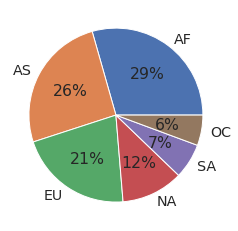

In [ ]:
df = reg_data['Continent'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%")
plt.savefig('Pie_chart_continent.png')
plt.show()

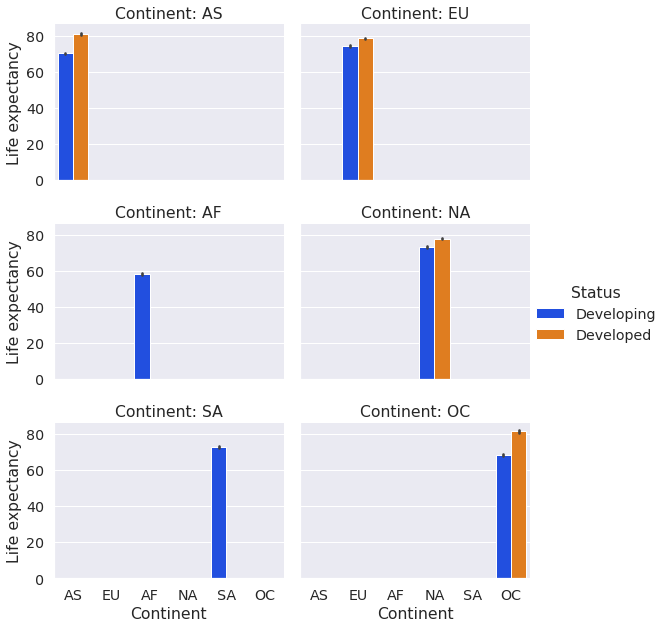

In [ ]:
g = sns.catplot(
        x='Continent', 
        y='Life expectancy', 
        data=reg_data,
        palette='bright',
        height=3, aspect=1.3,
        kind='bar',
        hue='Status', 
        col ='Continent',
        col_wrap=2)

g.set_titles(
    'Continent: {col_name}');
g.savefig('bar_chart_continent.png')
plt.show()

In [ ]:
# Removing the Country Column 
reg_data.drop(['Country'],axis =1,inplace =True)
reg_data_with_out_country = reg_data.copy()
reg_data_with_out_country.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,AS
1,Developing,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,AS
2,Developing,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,AS
3,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,AS
4,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,AS


In [ ]:
reg_data_with_out_country.shape

(2938, 19)

###Label Encoding

In [ ]:
#Label Encoding The Categorical variable
#Status
#Continent

# Developing -1, Developed-0
labelencoder = LabelEncoder()
reg_data['Status'] = labelencoder.fit_transform(reg_data['Status'])
le_continent_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_continent_mapping)
# AS -1, AF-0, NA,SA,EU,OC
labelencoder = LabelEncoder()
reg_data['Continent'] = labelencoder.fit_transform(reg_data['Continent'])
le_continent_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_continent_mapping)



{'Developed': 0, 'Developing': 1}
{'AF': 0, 'AS': 1, 'EU': 2, 'NA': 3, 'OC': 4, 'SA': 5}


In [ ]:
label_encoded_data = reg_data.copy()
label_encoded_data.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,1,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,1,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,1,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,1,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,1,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


###Normalization
Normalizing the continous and discrete columns

In [ ]:
reg_data.columns


Index(['Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent'],
      dtype='object')

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# scaler = preprocessing.RobustScaler()
reg_data[['Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']] = scaler.fit_transform(reg_data[['Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']])
print(len(reg_data))
# norm_reg_data = pd.DataFrame(norm,columns=[reg_data.columns])
norm_reg_data = reg_data.copy()
norm_reg_data.head()


2938


,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,1,0.544592,0.362881,0.034444,0.0,0.653061,0.005439,0.209733,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1
1,1,0.447818,0.373961,0.035556,0.0,0.622449,0.002319,0.203940,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1
2,1,0.447818,0.369806,0.036667,0.0,0.642857,0.002027,0.198146,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1
3,1,0.440228,0.375346,0.038333,0.0,0.673469,0.013135,0.192352,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1
4,1,0.434535,0.379501,0.039444,0.0,0.683673,0.014200,0.187717,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1


###Splitting The Data For Modelling


In [ ]:
# Split features and Target Variable
features = ['Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent']
X = norm_reg_data.loc[:, features]
y = norm_reg_data['Life expectancy']
X.head()

,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,1,0.362881,0.034444,0.0,0.653061,0.005439,0.209733,0.031250,0.452118,0.649485,0.0,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923,1
1,1,0.373961,0.035556,0.0,0.622449,0.002319,0.203940,0.572917,0.453279,0.618557,0.0,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092,1
2,1,0.369806,0.036667,0.0,0.642857,0.002027,0.198146,0.614583,0.450377,0.639175,0.0,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261,1
3,1,0.375346,0.038333,0.0,0.673469,0.013135,0.192352,0.666667,0.473012,0.670103,0.0,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430,1
4,1,0.379501,0.039444,0.0,0.683673,0.014200,0.187717,0.677083,0.435287,0.680412,0.0,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937,1


In [ ]:
X.tail()

,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
2933,1,1.000000,0.015000,0.243561,0.683673,0.000146,0.302433,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444,0
2934,1,0.988920,0.014444,0.226764,0.061224,0.004703,0.297798,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937,0
2935,1,0.099723,0.013889,0.247480,0.734694,0.001433,0.293163,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092,0
2936,1,0.948753,0.013889,0.095745,0.765306,0.002493,0.288528,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430,0
2937,1,0.919668,0.013333,0.093505,0.795918,0.006989,0.283893,0.781250,0.390598,0.783505,0.859406,0.004579,0.009446,0.394928,0.389474,0.457806,0.473430,0


In [ ]:
y.head()

0    0.544592
1    0.447818
2    0.447818
3    0.440228
4    0.434535
Name: Life expectancy, dtype: float64

In [ ]:
X.shape


(2938, 18)

In [ ]:
y.shape

(2938,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(2350, 18)
(588, 18)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(2350,)
(588,)


###Train the Model-Modelling

1. Linear Regression

In [ ]:
# create linear regression object
reg_model = linear_model.LinearRegression()
  
# train the model using the training sets
reg_model.fit(X_train, y_train)

print(reg_model)
  
# regression coefficients
print('Coefficients: ', reg_model.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg_model.score(X_test, y_test)))
  

LinearRegression()
Coefficients:  [-4.58327247e-02 -2.75364157e-01 -7.51856029e-02 -1.01880448e-02
 -3.64516643e-02 -1.14975569e-01  4.64049129e-02  5.79677735e-02
  1.84113425e-04  8.65508910e-02 -4.13593932e-01  1.13486050e-01
  3.63428963e-02 -2.46978643e-02  3.78577413e-02  1.31109467e-01
  2.25387137e-01  1.58374993e-02]
Variance score: 0.8193990488388645


###Prediction


In [ ]:
print(np.mean(cross_val_score(reg_model, X, y, cv=3)))

0.7817119211278726


In [ ]:
y_pred = reg_model.predict(X_test)
print(y_pred.shape)
# type(y_pred)
# print(y_pred)
y_pred = pd.Series(y_pred)
# plt.scatter(X_train,y_train)
# plt.plot(X_test,y_pred,color='red')
# plt.show()
pred_df = pd.DataFrame({"Actual": y_test, "Predictions": reg_model.predict(X_test)})


pred_df.tail(10)
# pred_df.shape

(588,)


,Actual,Predictions
2382,0.305503,0.477090
2340,0.717268,0.752599
767,0.406072,0.318601
2798,0.804554,0.789389
2355,0.781784,0.850367
859,0.444023,0.425486
1405,0.705882,0.754965
962,0.470588,0.505493
2658,0.631879,0.667706
2272,0.715370,0.699528


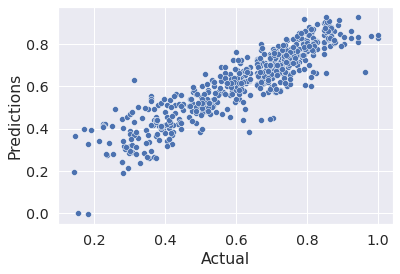

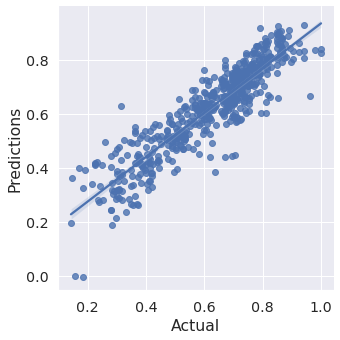

In [ ]:
ax = sns.scatterplot(x="Actual", y="Predictions", data=pred_df,palette='bright',)
sns.lmplot(x="Actual", y="Predictions", data=pred_df,palette='bright')
plt.savefig('LR_1.png')
plt.show()

### Evaluating The model


In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2-Score:',metrics.r2_score(y_test,y_pred))
#Adjusted R2-Score
#fit regression model

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()
# print('Adjusted R2-Score:',model.rsquared_adj)
Adj_r2 = 1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R2-Score:',Adj_r2)

MAE: 0.0554844559492525
MSE: 0.005633698106278816
RMSE: 0.0750579649756028
R2-Score: 0.8193990488388645
Adjusted R2-Score: 0.8182231002192409


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[-4.58327247e-02 -2.75364157e-01 -7.51856029e-02 -1.01880448e-02
 -3.64516643e-02 -1.14975569e-01  4.64049129e-02  5.79677735e-02
  1.84113425e-04  8.65508910e-02 -4.13593932e-01  1.13486050e-01
  3.63428963e-02 -2.46978643e-02  3.78577413e-02  1.31109467e-01
  2.25387137e-01  1.58374993e-02]
Feature: 0, Score: -0.04583
Feature: 1, Score: -0.27536
Feature: 2, Score: -0.07519
Feature: 3, Score: -0.01019
Feature: 4, Score: -0.03645
Feature: 5, Score: -0.11498
Feature: 6, Score: 0.04640
Feature: 7, Score: 0.05797
Feature: 8, Score: 0.00018
Feature: 9, Score: 0.08655
Feature: 10, Score: -0.41359
Feature: 11, Score: 0.11349
Feature: 12, Score: 0.03634
Feature: 13, Score: -0.02470
Feature: 14, Score: 0.03786
Feature: 15, Score: 0.13111
Feature: 16, Score: 0.22539
Feature: 17, Score: 0.01584


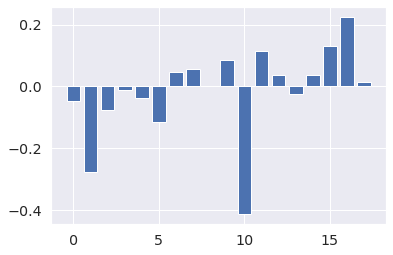

In [ ]:
# get importance
importance = reg_model.coef_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

2. Random Forest Regressor

In [ ]:
random_forest_data = label_encoded_data.copy()

In [ ]:
random_forest_data.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,1,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,1,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,1,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,1,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,1,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


In [ ]:
# Split features and Target Variable
features = ['Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent']
X = random_forest_data.loc[:, features]
y = random_forest_data['Life expectancy']
# X = norm_reg_data.loc[:, features]
# y = norm_reg_data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)

In [ ]:
 # create regressor object
rm_reg_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rm_reg_model.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
print(np.mean(cross_val_score(rm_reg_model, X, y, cv=3)))

0.8976680495737059


In [ ]:
y_pred = rm_reg_model.predict(X_test)
print(y_pred.shape)

# plt.scatter(X_train,y_train)
# plt.plot(X_test,y_pred,color='red')
# plt.show()
pred_df_rf_model = pd.DataFrame({"Actual": y_test, "Predictions": reg_model.predict(X_test)})

pred_df_rf_model.tail(10)
# pred_df.shape

(588,)


,Actual,Predictions
2382,52.4,50489.177251
2340,74.1,50569.892140
767,57.7,26624.050631
2798,78.7,50576.639570
2355,77.5,2164.968786
859,59.7,16897.314540
1405,73.5,53435.991707
962,61.1,50524.387305
2658,69.6,4971.540789
2272,74.0,26776.014899


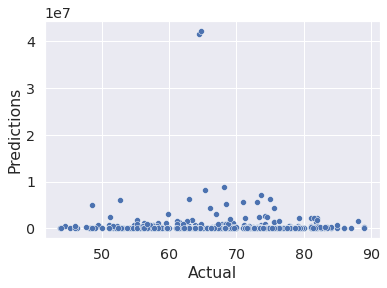

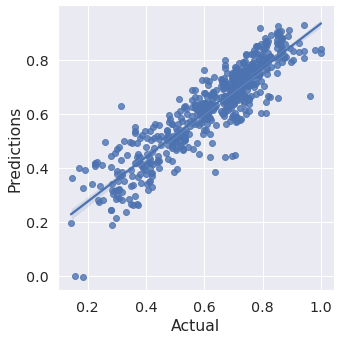

In [ ]:
ax = sns.scatterplot(x="Actual", y="Predictions", data=pred_df_rf_model,palette='bright',)
sns.lmplot(x="Actual", y="Predictions", data=pred_df,palette='bright')
plt.savefig('RF_1.png')
plt.show()

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2-Score:',metrics.r2_score(y_test,y_pred))
#Adjusted R2-Score
Adj_r2 = 1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R2-Score:',Adj_r2)

MAE: 1.0983024457733896
MSE: 2.770735704866656
RMSE: 1.6645527041420636
R2-Score: 0.9680183892315858
Adjusted R2-Score: 0.9678211747766932


Feature: 0, Score: 0.00031
Feature: 1, Score: 0.12252
Feature: 2, Score: 0.01324
Feature: 3, Score: 0.00714
Feature: 4, Score: 0.00235
Feature: 5, Score: 0.00338
Feature: 6, Score: 0.00711
Feature: 7, Score: 0.00467
Feature: 8, Score: 0.00573
Feature: 9, Score: 0.00387
Feature: 10, Score: 0.58924
Feature: 11, Score: 0.00551
Feature: 12, Score: 0.00366
Feature: 13, Score: 0.00516
Feature: 14, Score: 0.00906
Feature: 15, Score: 0.16349
Feature: 16, Score: 0.01366
Feature: 17, Score: 0.03992


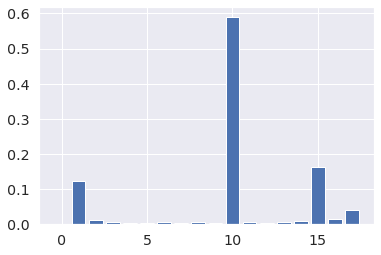

In [ ]:
# get importance
importance = rm_reg_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

3. XGBoost Regressor

In [ ]:
xgb_data = label_encoded_data.copy()

In [ ]:
# Split features and Target Variable
features = ['Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent']
X = xgb_data.loc[:, features]
y = xgb_data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)
 # create regressor object
xgb_reg_model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)
 
# fit the regressor with x and y data
xgb_reg_model.fit(X_train, y_train) 


[08:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

In [ ]:
print(np.mean(cross_val_score(xgb_reg_model, X, y, cv=3)))

[08:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.906134063059095


In [ ]:
y_pred = xgb_reg_model.predict(X_test)
print(y_pred.shape)

# plt.scatter(X_train,y_train)
# plt.plot(X_test,y_pred,color='red')
# plt.show()
pred_df_xgb_model = pd.DataFrame({"Actual": y_test, "Predictions": xgb_reg_model.predict(X_test)})
pred_df_xgb_model.tail(10)

(588,)


,Actual,Predictions
2382,52.4,54.769115
2340,74.1,75.583618
767,57.7,56.313721
2798,78.7,77.631569
2355,77.5,79.385429
859,59.7,58.893353
1405,73.5,74.383224
962,61.1,63.322498
2658,69.6,72.012520
2272,74.0,74.066063


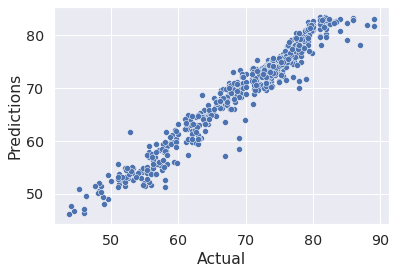

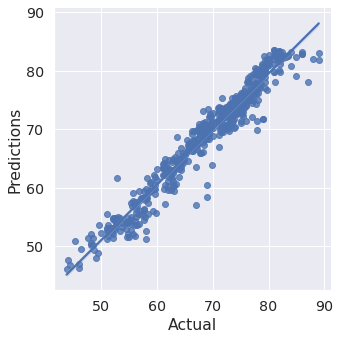

In [ ]:
#Regression Plot
ax = sns.scatterplot(x="Actual", y="Predictions", data=pred_df_xgb_model,palette='bright',)
sns.lmplot(x="Actual", y="Predictions", data=pred_df_xgb_model,palette='bright')
plt.savefig('XGB_1.png')
plt.show()

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2-Score:',metrics.r2_score(y_test,y_pred))
#Adjusted R2-Score
Adj_r2 = 1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R2-Score:',Adj_r2)

MAE: 1.527565626624632
MSE: 4.421126060683764
RMSE: 2.102647393331503
R2-Score: 0.9489685239257833
Adjusted R2-Score: 0.9486538385645857


Feature: 0, Score: 0.00484
Feature: 1, Score: 0.04595
Feature: 2, Score: 0.03448
Feature: 3, Score: 0.01024
Feature: 4, Score: 0.01654
Feature: 5, Score: 0.00352
Feature: 6, Score: 0.02163
Feature: 7, Score: 0.01518
Feature: 8, Score: 0.00352
Feature: 9, Score: 0.02985
Feature: 10, Score: 0.44092
Feature: 11, Score: 0.00344
Feature: 12, Score: 0.00278
Feature: 13, Score: 0.00753
Feature: 14, Score: 0.02521
Feature: 15, Score: 0.21555
Feature: 16, Score: 0.08114
Feature: 17, Score: 0.03769


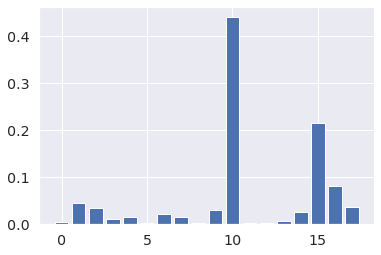

In [ ]:
# get importance
importance = xgb_reg_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

4. Decision Tree Regressor

In [ ]:
dt_data = label_encoded_data.copy()

In [ ]:
# Split features and Target Variable
features = ['Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent']
X = xgb_data.loc[:, features]
y = xgb_data['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = .80)
 # create regressor object
dt_reg_model = DecisionTreeRegressor(random_state=0)
 
# fit the regressor with x and y data
dt_reg_model.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [ ]:
print(np.mean(cross_val_score(dt_reg_model, X, y, cv=3)))

0.7692983144473161


In [ ]:
y_pred = dt_reg_model.predict(X_test)
print(y_pred.shape)

# plt.scatter(X_train,y_train)
# plt.plot(X_test,y_pred,color='red')
# plt.show()
pred_df_dt_model = pd.DataFrame({"Actual": y_test, "Predictions": dt_reg_model.predict(X_test)})
pred_df_dt_model.tail(10)

(588,)


,Actual,Predictions
2382,52.4,54.0
2340,74.1,74.3
767,57.7,57.4
2798,78.7,78.7
2355,77.5,81.8
859,59.7,58.0
1405,73.5,73.3
962,61.1,66.0
2658,69.6,69.9
2272,74.0,73.6


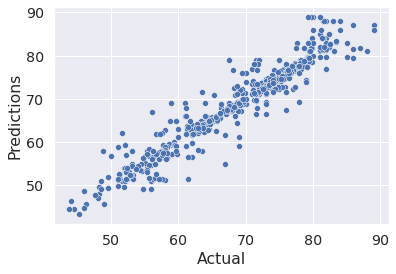

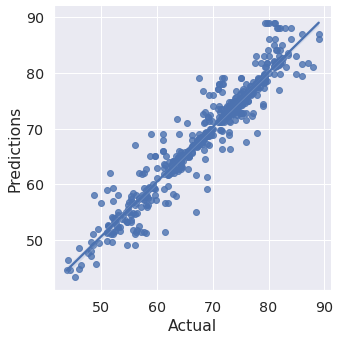

In [ ]:
#Regression Plot
ax = sns.scatterplot(x="Actual", y="Predictions", data=pred_df_dt_model,palette='bright',)
sns.lmplot(x="Actual", y="Predictions", data=pred_df_dt_model,palette='bright')
plt.savefig('DTREE.png')
plt.show()

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2-Score:',metrics.r2_score(y_test,y_pred))
#Adjusted R2-Score
Adj_r2 = 1 - (1-metrics.r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R2-Score:',Adj_r2)

MAE: 1.6654337896360731
MSE: 7.74444048316841
RMSE: 2.7828834835774945
R2-Score: 0.9106086947532366
Adjusted R2-Score: 0.9100574636828558


Feature: 0, Score: 0.00072
Feature: 1, Score: 0.11340
Feature: 2, Score: 0.02151
Feature: 3, Score: 0.00842
Feature: 4, Score: 0.00194
Feature: 5, Score: 0.00267
Feature: 6, Score: 0.00333
Feature: 7, Score: 0.00264
Feature: 8, Score: 0.00636
Feature: 9, Score: 0.00560
Feature: 10, Score: 0.58153
Feature: 11, Score: 0.00694
Feature: 12, Score: 0.00335
Feature: 13, Score: 0.00196
Feature: 14, Score: 0.01096
Feature: 15, Score: 0.17566
Feature: 16, Score: 0.00560
Feature: 17, Score: 0.04742


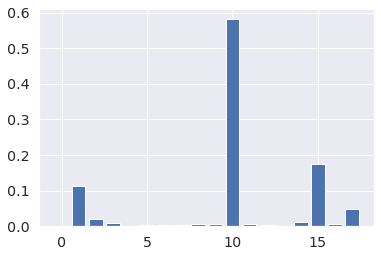

In [ ]:
# get importance
importance = dt_reg_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We create Four models and we got better result in XGboost regressor.And also all models are working good according to our data except random forest regressor.
